In [178]:
!gdown 1ErCm9gTP07yB6_RzqVPuNwB0bxEFEdOs

!pip install python-dp
import pydp # by convention our package is to be imported as dp (dp for Differential Privacy!)
from pydp.algorithms.laplacian import BoundedSum, BoundedMean, Count, Max
import statistics
import matplotlib.pyplot as plt
!pip install diffprivlib

Downloading...
From: https://drive.google.com/uc?id=1ErCm9gTP07yB6_RzqVPuNwB0bxEFEdOs
To: /content/MedicalAppointmentNoShow-new.csv
100% 10.7M/10.7M [00:00<00:00, 118MB/s]


In [179]:
import pandas as pd
import numpy as np
import diffprivlib.models as dp
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [180]:
df = pd.read_csv("MedicalAppointmentNoShow-new.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [181]:
print(df.isna().sum())
# print(df.shape)
null_value_percentages=(df.isna().sum()/df.shape[0])*100
null_value_percentages

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

In [182]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [183]:
from datetime import datetime

year_list=[]
month_list=[]
date_list=[]

for timestamp in df['ScheduledDay']:
  dt = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ')
  year_list.append(dt.year)
  month_list.append(dt.month)
  date_list.append(dt.day)

df['ScheduledYear']=year_list
df['ScheduledMonth']=month_list
df['ScheduledDate']=date_list

df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df['Neighbourhood'] = df['Neighbourhood'].astype('category')
df['Neighbourhood'] = df['Neighbourhood'].cat.codes
df['AppointmentID'] = df['AppointmentID'].astype('category')
df['AppointmentID'] = df['AppointmentID'].cat.codes
df['PatientId'] = df['PatientId'].astype('category')
df['PatientId'] = df['PatientId'].cat.codes
df['No-show'] = df['No-show'].astype('category')
df['No-show'] = df['No-show'].cat.codes

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate
0,30845,29332,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0,2016,4,29
1,55325,29079,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0,2016,4,29
2,15722,29115,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0,2016,4,29
3,9018,29299,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0,2016,4,29
4,23941,29073,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0,2016,4,29


In [184]:
print(df['ScheduledDate'].unique())
print(df['ScheduledYear'].unique())
print(df['ScheduledMonth'].unique())

[29 27 26 28 25 20 31 19  6 18 11 12 15  1  5  8 14 13  7 17 30  4 21 23
 22 16 10 24  2  3  9]
[2016 2015]
[ 4  3  2  1  5 11 12  6]


In [185]:
year_list=[]
month_list=[]
date_list=[]

for timestamp in df['AppointmentDay']:
  if not pd.isnull(timestamp):
    dt = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ')
    year_list.append(dt.year)
    month_list.append(dt.month)
    date_list.append(dt.day)

df['AppointmentYear']=year_list
df['AppointmentMonth']=month_list
df['AppointmentDate']=date_list

In [186]:
df.drop(columns=['ScheduledDay', 'AppointmentDay', 'AppointmentID'], inplace=True)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   PatientId         110527 non-null  int32
 1   Gender            110527 non-null  int8 
 2   Age               110527 non-null  int64
 3   Neighbourhood     110527 non-null  int8 
 4   Scholarship       110527 non-null  int64
 5   Hipertension      110527 non-null  int64
 6   Diabetes          110527 non-null  int64
 7   Alcoholism        110527 non-null  int64
 8   Handcap           110527 non-null  int64
 9   SMS_received      110527 non-null  int64
 10  No-show           110527 non-null  int8 
 11  ScheduledYear     110527 non-null  int64
 12  ScheduledMonth    110527 non-null  int64
 13  ScheduledDate     110527 non-null  int64
 14  AppointmentYear   110527 non-null  int64
 15  AppointmentMonth  110527 non-null  int64
 16  AppointmentDate   110527 non-null  int64
dtypes: int32(1

In [188]:
Y = df['No-show']
X = df.drop(columns=['No-show'], inplace=False)
X

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledYear,ScheduledMonth,ScheduledDate,AppointmentYear,AppointmentMonth,AppointmentDate
0,30845,0,62,39,0,1,0,0,0,0,2016,4,29,2016,4,29
1,55325,1,56,39,0,0,0,0,0,0,2016,4,29,2016,4,29
2,15722,0,62,45,0,0,0,0,0,0,2016,4,29,2016,4,29
3,9018,0,8,54,0,0,0,0,0,0,2016,4,29,2016,4,29
4,23941,0,56,39,0,1,1,0,0,0,2016,4,29,2016,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,12800,0,56,43,0,0,0,0,0,1,2016,5,3,2016,6,7
110523,14603,0,51,43,0,0,0,0,0,1,2016,5,3,2016,6,7
110524,27287,0,21,43,0,0,0,0,0,1,2016,4,27,2016,6,7
110525,45960,0,38,43,0,0,0,0,0,1,2016,4,27,2016,6,7


In [189]:
df.describe()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate,AppointmentYear,AppointmentMonth,AppointmentDate
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0,110527.000000,110527.000000
mean,31120.514318,0.350023,37.088874,41.737286,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,2015.999439,4.823871,14.252228,2016.0,5.210048,12.499398
std,17991.073188,0.476979,23.110205,22.361634,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,0.023678,0.715801,9.345629,0.0,0.473780,9.056482
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,2016.0,4.000000,1.000000
25%,15559.500000,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,2016.0,5.000000,5.000000
50%,31064.000000,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,13.000000,2016.0,5.000000,10.000000
75%,46579.500000,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,5.000000,22.000000,2016.0,5.000000,19.000000
max,62298.000000,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2016.000000,12.000000,31.000000,2016.0,6.000000,31.000000


Non-private test accuracy: 80.11%
[[17698    27]
 [ 4369    12]]


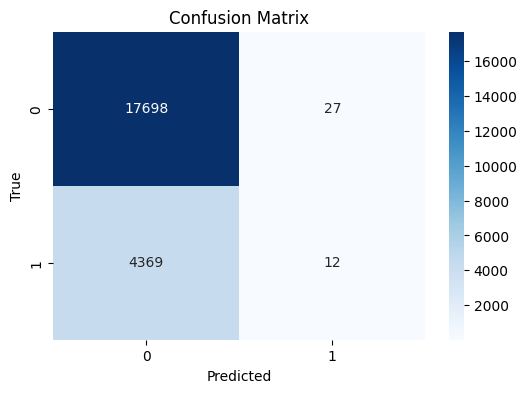

In [209]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.naive_bayes import GaussianNB

nonprivate_clf = GaussianNB()
nonprivate_clf.fit(X_train, Y_train)
Y_pred = nonprivate_clf.predict(X_test)

print("Non-private test accuracy: %.2f%%" %
     (nonprivate_clf.score(X_test, Y_test) * 100))

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


[[16960   765]
 [ 4167   214]]
Differentially private test accuracy (epsilon=0.01): 77.69%


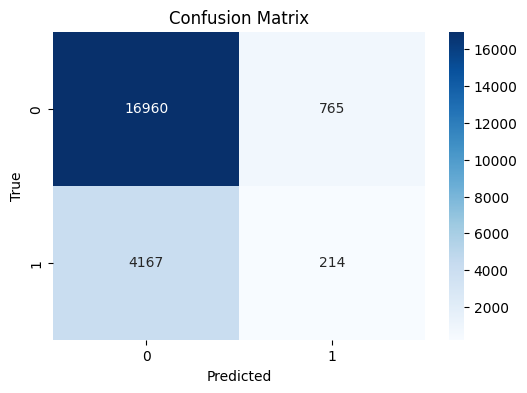

In [208]:
dp_clf = dp.GaussianNB(random_state=0, epsilon=0.01)

dp_clf.fit(X_train, Y_train)
Y_pred2 = dp_clf.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred2)
print(cm)

print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" %
      (dp_clf.epsilon, dp_clf.score(X_test, Y_test) * 100))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [192]:
df = df[df['Age'] != -1]
df.describe()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate,AppointmentYear,AppointmentMonth,AppointmentDate
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0,110526.000000,110526.000000
mean,31120.308099,0.350026,37.089219,41.737121,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,2015.999439,4.823860,14.252303,2016.0,5.210041,12.499457
std,17991.023948,0.476980,23.110026,22.361668,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,0.023678,0.715795,9.345638,0.0,0.473776,9.056502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,2016.0,4.000000,1.000000
25%,15559.250000,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,2016.0,5.000000,5.000000
50%,31064.000000,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,13.000000,2016.0,5.000000,10.000000
75%,46579.000000,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,5.000000,22.000000,2016.0,5.000000,19.000000
max,62298.000000,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2016.000000,12.000000,31.000000,2016.0,6.000000,31.000000


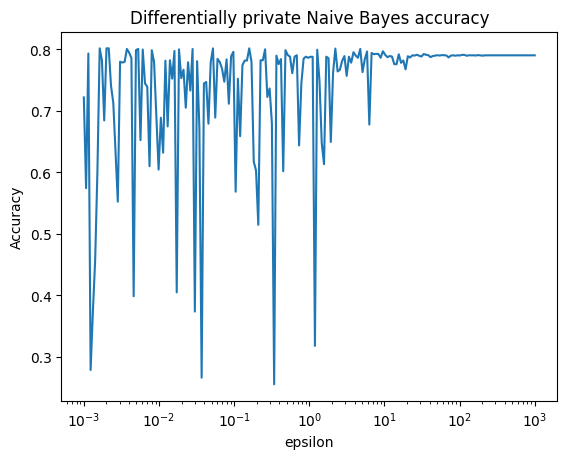

0.8018185108115444
0.0016257556664437934


In [193]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-3, 3, 200)
max_accuracy=0
max_epsilon=0
bounds = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2015, 1, 1, 2016, 4, 1], [62298, 1, 115, 80, 1, 1, 1, 1, 4, 1, 2016, 12, 31, 2016, 6, 31])
accuracy = list()

for epsilon in epsilons:
    # clf = dp.LogisticRegression(epsilon=epsilon)
    clf = dp.GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, Y_train)

    accuracy.append(clf.score(X_test, Y_test))
    value = clf.score(X_test, Y_test)
    if(value>max_accuracy):
      max_accuracy=value
      max_epsilon = epsilon

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Naive Bayes accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

print(max_accuracy)
print(max_epsilon)

37.089218826339504
36.95269532060715
23.109920972651345
24.29656865261812


/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


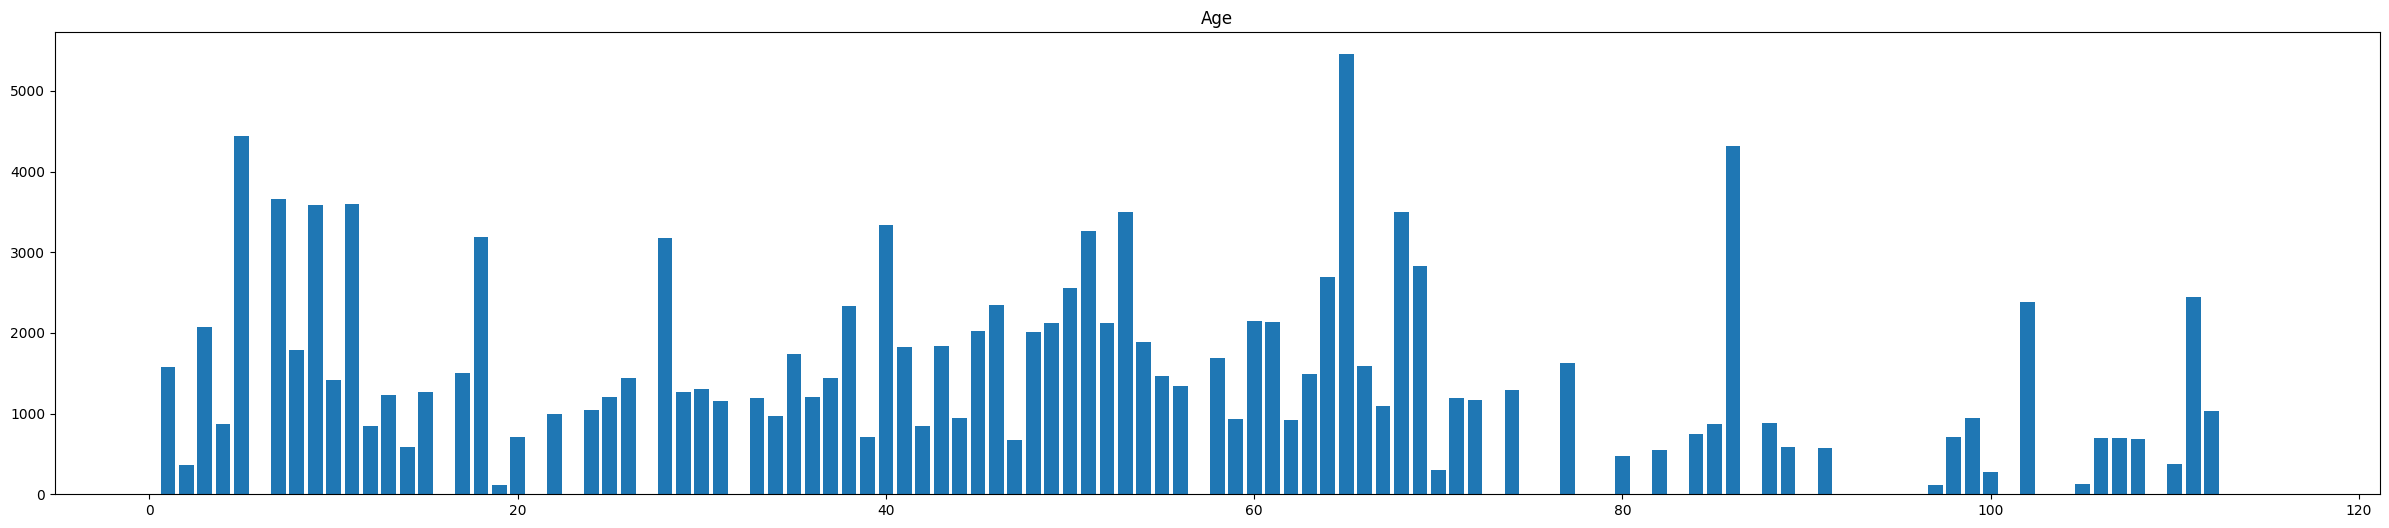

In [194]:
import diffprivlib.tools as tools
import matplotlib.pyplot as plt

column = df['Age']

print(np.mean(column))
print(tools.mean(column, bounds=(0,115), epsilon = 0.01))

print(np.std(column))
print(tools.std(column, bounds=(0, 115), epsilon = 0.01))

fig, ax = plt.subplots(1, 1, figsize=(30,6))

eps = [0.001, 0.01, 0.1, 1, 10, 100]

ax.bar(np.linspace(1, 115, 115), tools.histogram(column, epsilon=0.001, bins=115)[0])
ax.set_title("Age")
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


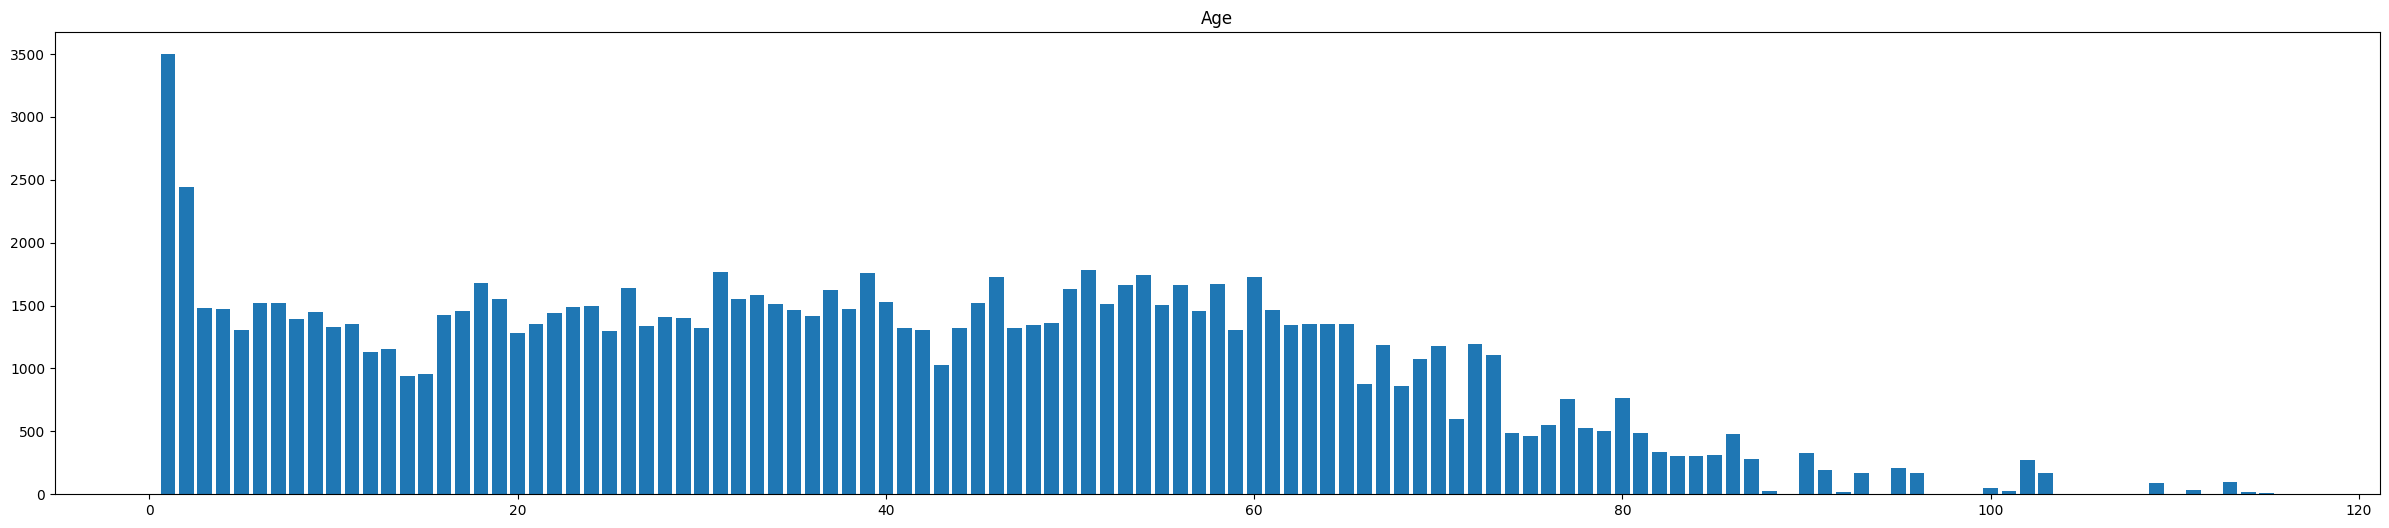

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(30,6))

ax.bar(np.linspace(1, 115, 115), tools.histogram(column, epsilon=0.01, bins=115)[0])
ax.set_title("Age")
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


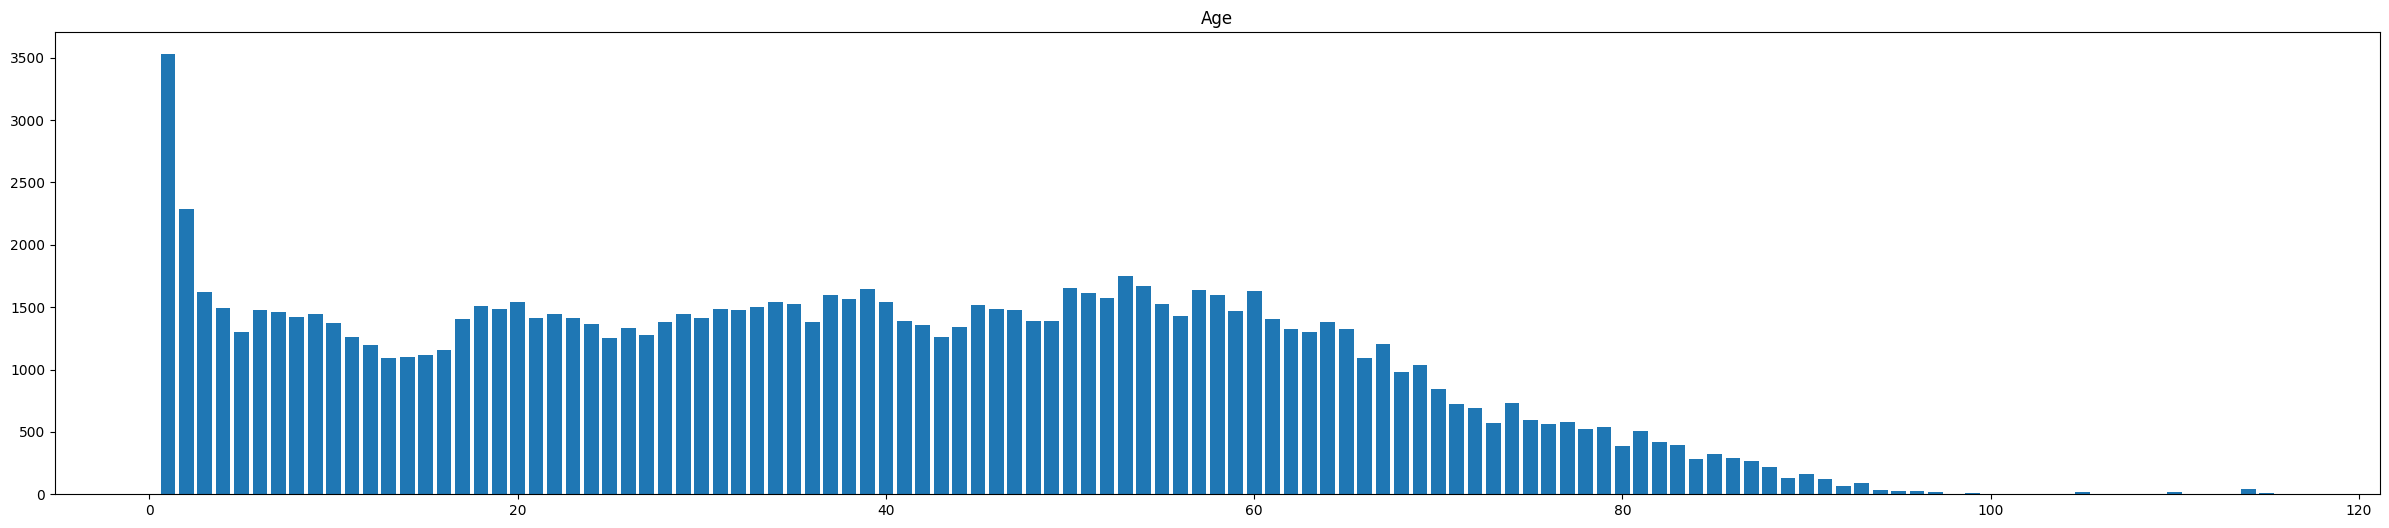

In [196]:
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.bar(np.linspace(1, 115, 115), tools.histogram(column, epsilon=0.1, bins=115)[0])
ax.set_title("Age")
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


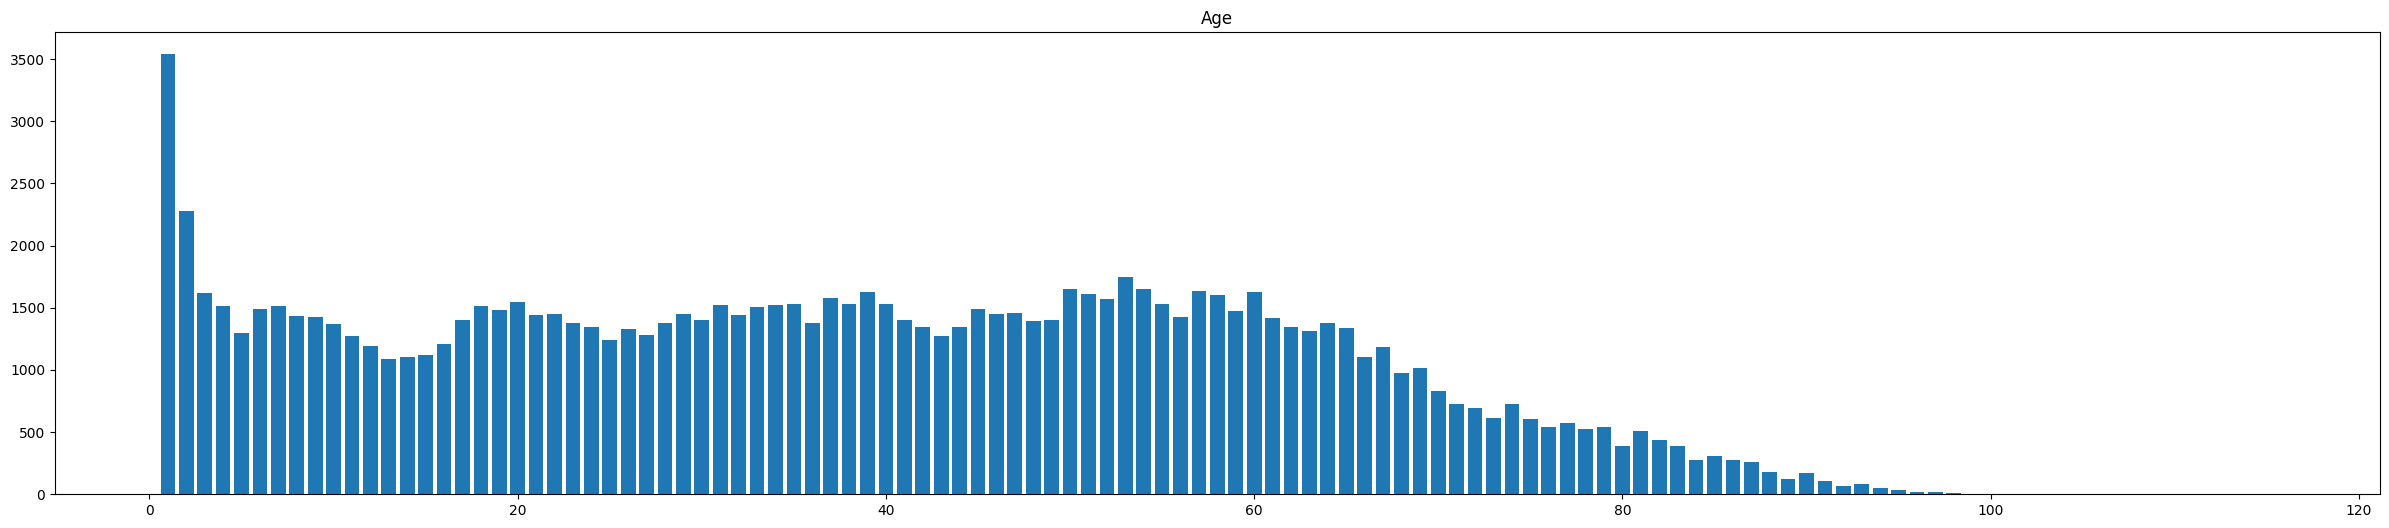

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.bar(np.linspace(1, 115, 115), tools.histogram(column, epsilon=1, bins=115)[0])
ax.set_title("Age")
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


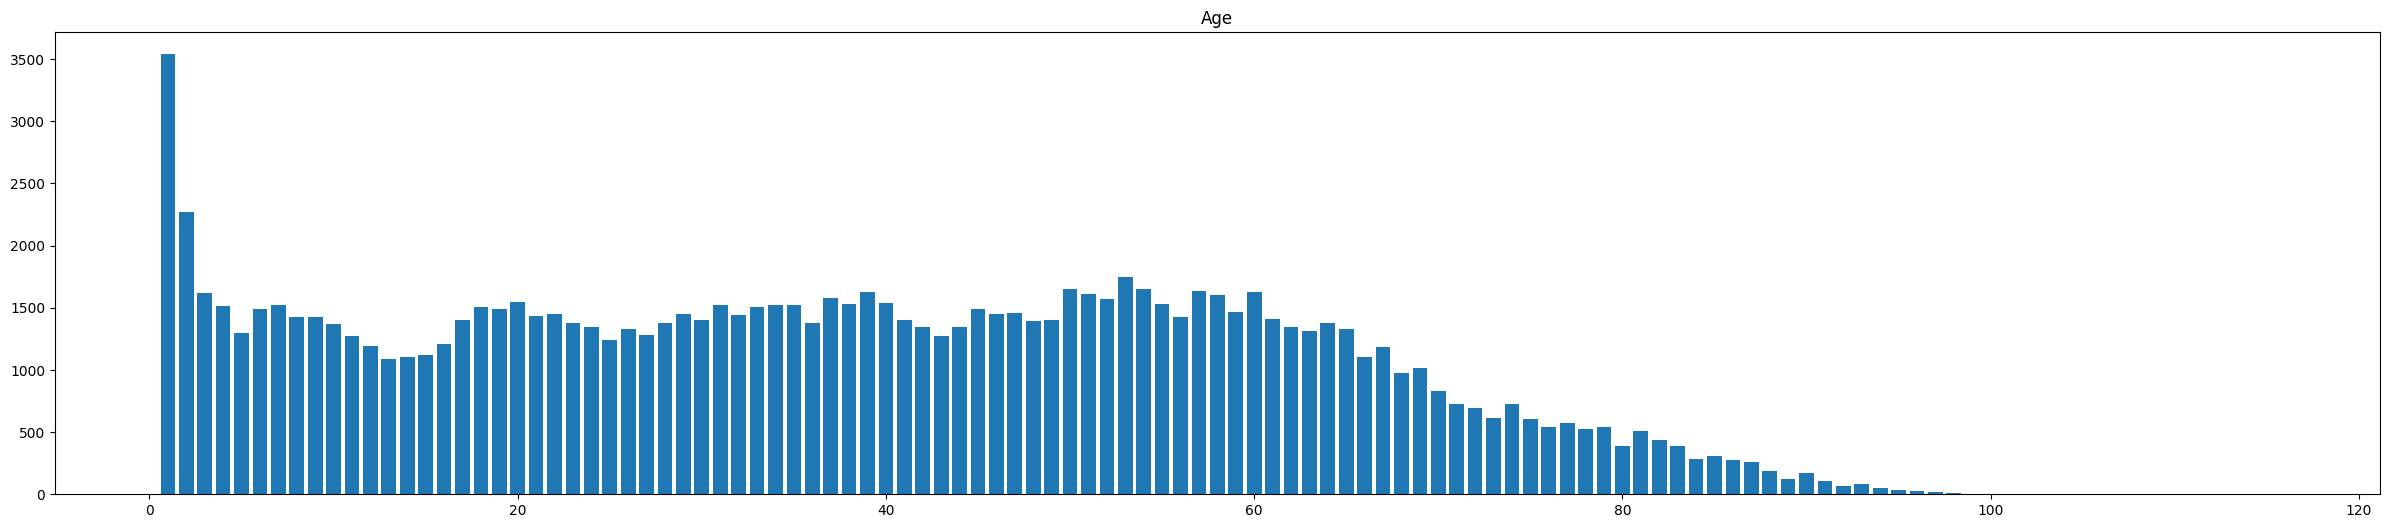

In [198]:
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.bar(np.linspace(1, 115, 115), tools.histogram(column, epsilon=10, bins=115)[0])
ax.set_title("Age")
plt.show()

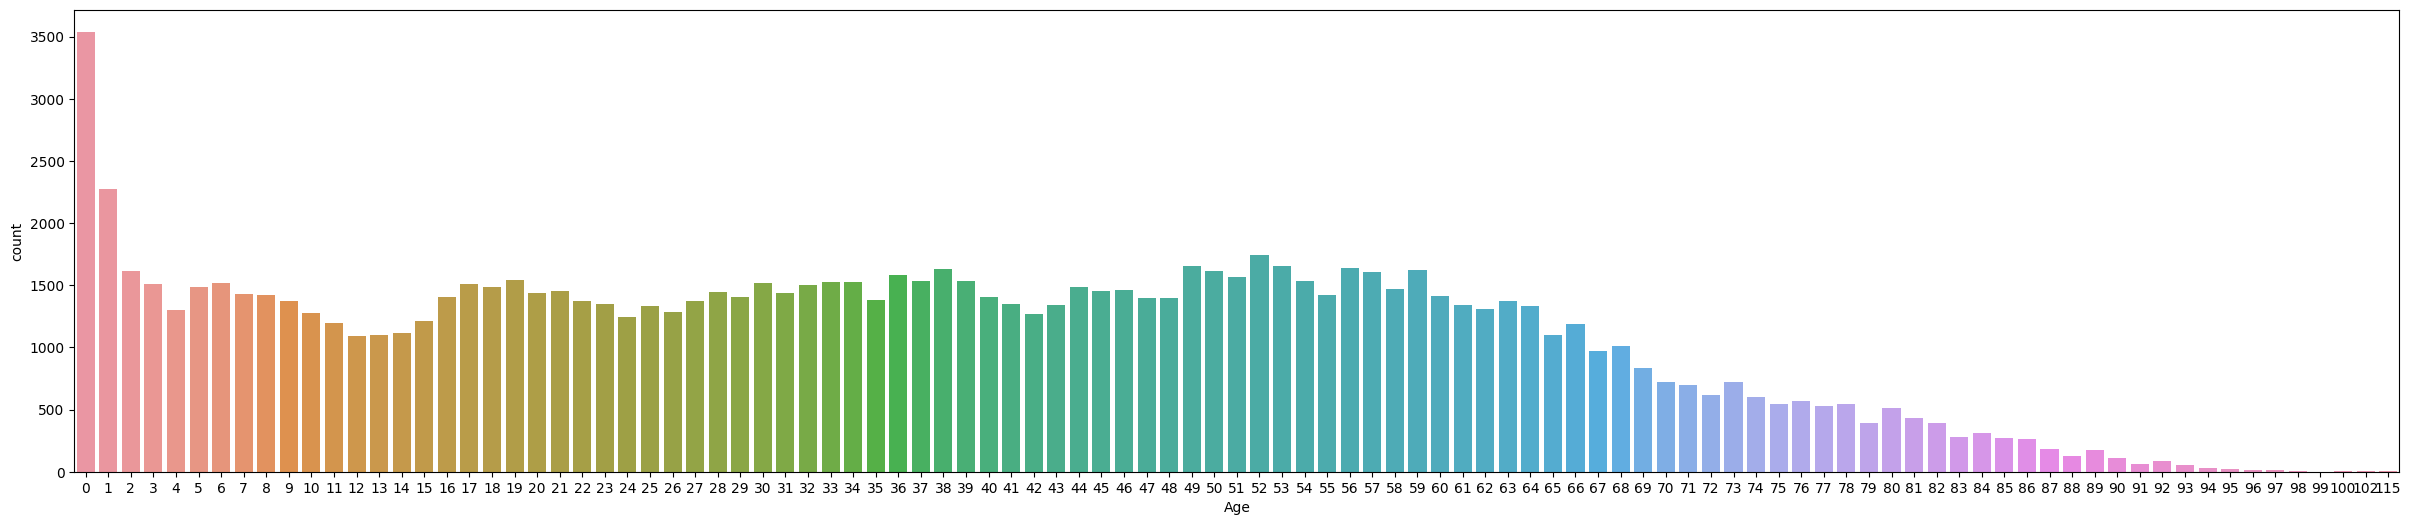

In [199]:
# ax.bar(np.linspace(1, 30, 30), plt.hist(column, bins=np.linspace(0, 115, 31), range=(0, 115))[0])

import seaborn as sns
plt.figure(figsize=(30, 6))
sns.countplot(x=column, data = df)
plt.show()

In [200]:
print(np.mean(column))
print(tools.mean(column, bounds=(0,115), epsilon = 0.0001))
print(tools.mean(column, bounds=(0,115), epsilon = 0.001))
print(tools.mean(column, bounds=(0,115), epsilon = 0.01))
print(tools.mean(column, bounds=(0,115), epsilon = 0.1))
print(tools.mean(column, bounds=(0,115), epsilon = 1))
print(tools.mean(column, bounds=(0,115), epsilon = 10))

37.089218826339504
35.376554243409295
37.9946914603377
37.139793967431316
37.07639042331463
37.08649578743473
37.089181804456736


In [201]:
print(np.std(column))
print(tools.std(column, bounds=(0,115), epsilon = 0.0001))
print(tools.std(column, bounds=(0,115), epsilon = 0.001))
print(tools.std(column, bounds=(0,115), epsilon = 0.01))
print(tools.std(column, bounds=(0,115), epsilon = 0.1))
print(tools.std(column, bounds=(0,115), epsilon = 1))
print(tools.std(column, bounds=(0,115), epsilon = 10))

23.109920972651345
31.99211501421916
11.825266704765141
24.15132332992134
23.128129486389554
23.09934325549837
23.10932513515264


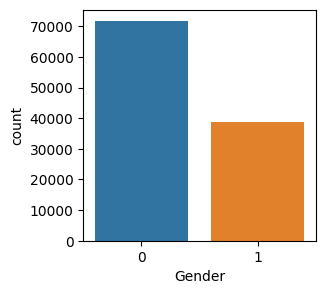

In [202]:
column = df['Gender']

plt.figure(figsize=(3, 3))
sns.countplot(x=column, data = df)
plt.show()

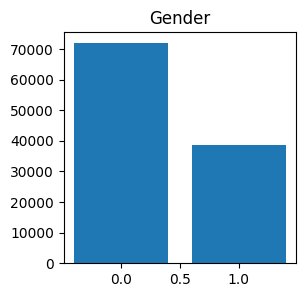

In [203]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))
ax.bar(np.linspace(0, 1, 2), tools.histogram(column, epsilon=0.1, bins=2, range=(0,1))[0])
ax.set_title("Gender")
plt.show()

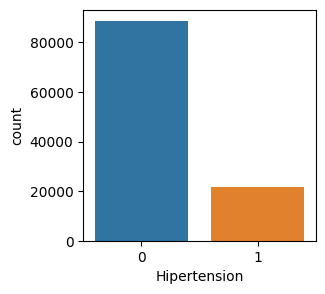

In [204]:
column = df['Hipertension']

plt.figure(figsize=(3, 3))
sns.countplot(x=column, data = df)
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


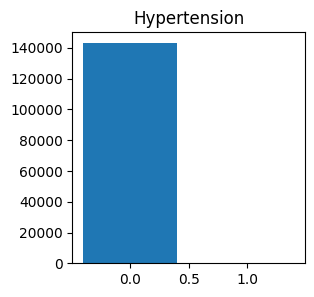

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))

ax.bar(np.linspace(0, 1, 2), tools.histogram(column, epsilon=0.00001, bins=2)[0])
ax.set_title("Hypertension")
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


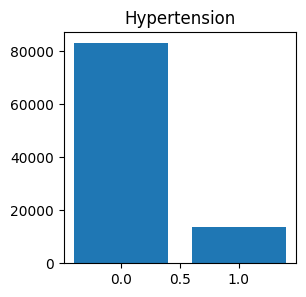

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))

ax.bar(np.linspace(0, 1, 2), tools.histogram(column, epsilon=0.0001, bins=2)[0])
ax.set_title("Hypertension")
plt.show()

/usr/local/lib/python3.10/dist-packages/diffprivlib/tools/histograms.py:137: PrivacyLeakWarning: Range parameter has not been specified. Falling back to taking range from the data.
To ensure differential privacy, and no additional privacy leakage, the range must be specified independently of the data (i.e., using domain knowledge).
  warnings.warn("Range parameter has not been specified. Falling back to taking range from the data.\n"


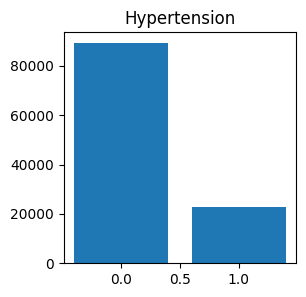

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))

ax.bar(np.linspace(0, 1, 2), tools.histogram(column, epsilon=0.001, bins=2)[0])
ax.set_title("Hypertension")
plt.show()